**Breast Cancer Detection**

**Introduction**

Breast cancer is one of the most common cancers among women worldwide. Early and accurate diagnosis is crucial for effective treatment. This project uses the Breast Cancer Wisconsin (Diagnostic) dataset to predict whether a tumor is malignant or benign based on features extracted from fine needle aspirate (FNA) images of cell nuclei. Machine learning models are applied to classify tumors and evaluate their performance using accuracy.

**Required Libraries**

In [ ]:
#!pip install streamlit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import pandas as pd
import numpy as np
import joblib

**Data Import**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample-submission.csv")

In [ ]:
train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis
0,869691,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300,NaN,M
1,898677,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,NaN,B
2,852973,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876,NaN,M
3,914580,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,92.82,607.3,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661,NaN,B
4,886776,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,...,119.80,928.8,0.1765,0.4503,0.44290,0.22290,0.3258,0.11910,NaN,M


**Exploratory Data Analysis (EDA)**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [ ]:
train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,2.983734e+07,14.183236,19.274171,92.345377,660.460553,0.096540,0.104395,0.090043,0.049586,0.181707,...,25.607663,107.907688,891.912563,0.132461,0.254167,0.276683,0.116187,0.291139,0.083802,NaN
std,1.278476e+08,3.548961,4.119494,24.438949,351.641745,0.014136,0.051625,0.080718,0.039031,0.027905,...,5.947946,33.937742,577.586383,0.021980,0.148297,0.209022,0.064881,0.060838,0.016672,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,...,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.666840e+05,11.717500,16.345000,75.467500,421.275000,0.086755,0.066712,0.030090,0.020710,0.161925,...,21.392500,84.430000,516.425000,0.117275,0.147325,0.117125,0.065600,0.252625,0.072310,NaN
50%,9.052360e+05,13.445000,18.895000,86.965000,556.950000,0.095825,0.094740,0.064905,0.033950,0.180050,...,25.300000,99.165000,700.650000,0.131350,0.217000,0.238900,0.105350,0.282800,0.079960,NaN
75%,8.810979e+06,16.115000,21.695000,106.525000,802.025000,0.106075,0.130500,0.132050,0.074112,0.196550,...,29.425000,127.100000,1143.500000,0.145900,0.342675,0.386400,0.166075,0.320600,0.092075,NaN
max,9.113205e+08,27.420000,33.810000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.200600,0.932700,1.252000,0.291000,0.577400,0.148600,NaN


In [ ]:
train.shape

(398, 33)

In [ ]:
train.isnull().sum()

,0
id,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


**Data Visualization**

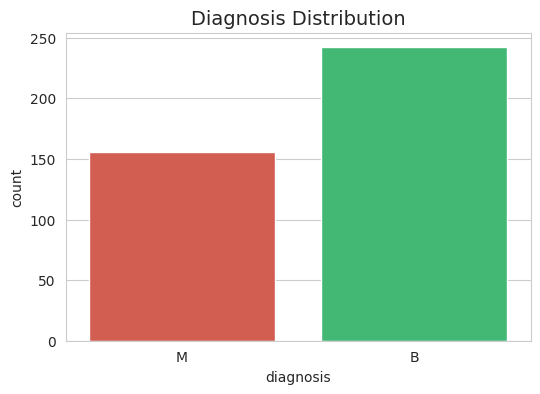

In [ ]:
sns.set_style("whitegrid")
palette_main = {"B":"#2ecc71", "M":"#e74c3c"}
plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=train, palette=palette_main)
plt.title("Diagnosis Distribution", fontsize=14)
plt.show()

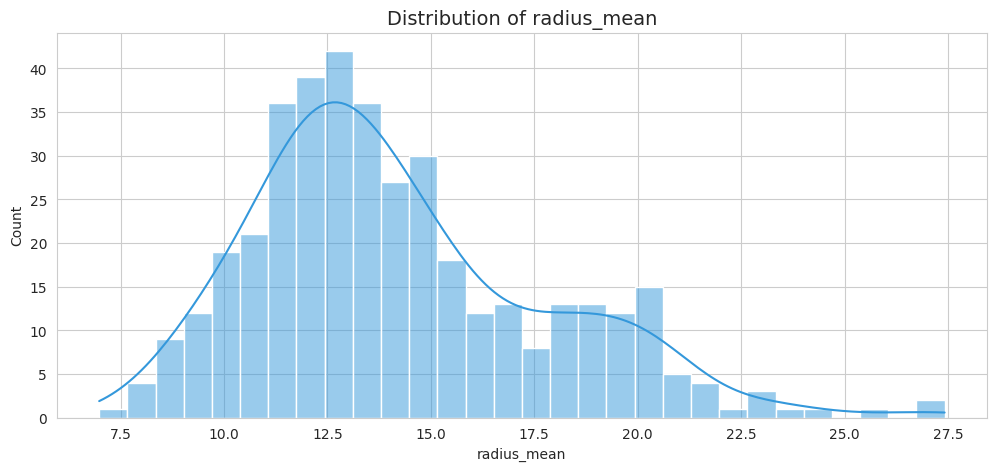

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(train["radius_mean"], kde=True, bins=30, color="#3498db")  # mavi
plt.title("Distribution of radius_mean", fontsize=14)
plt.show()

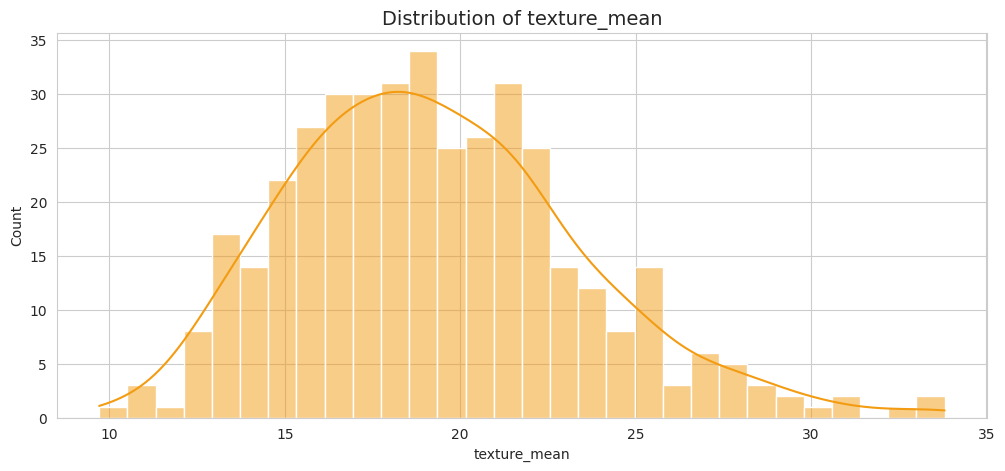

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(train["texture_mean"], kde=True, bins=30, color="#f39c12")  # turuncu
plt.title("Distribution of texture_mean", fontsize=14)
plt.show()

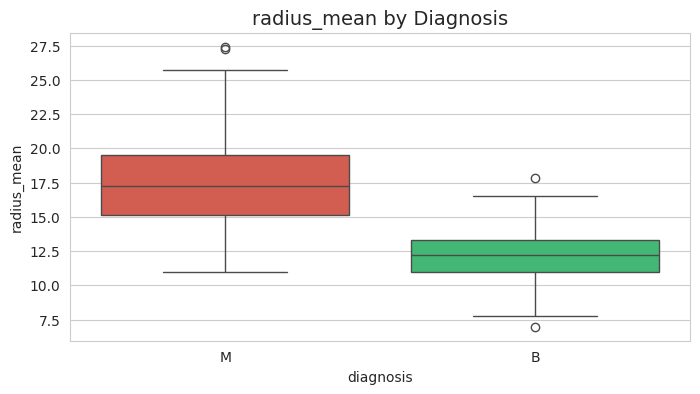

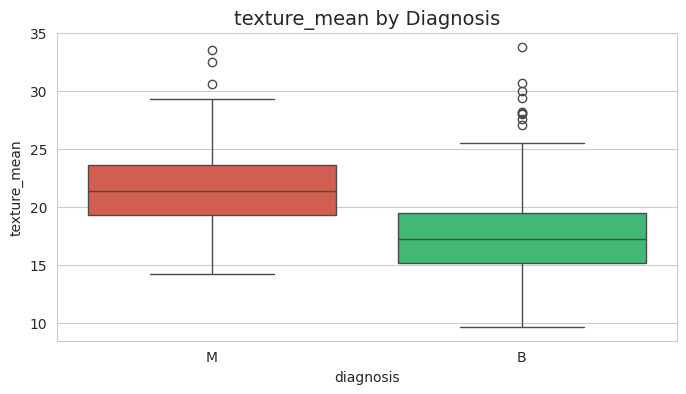

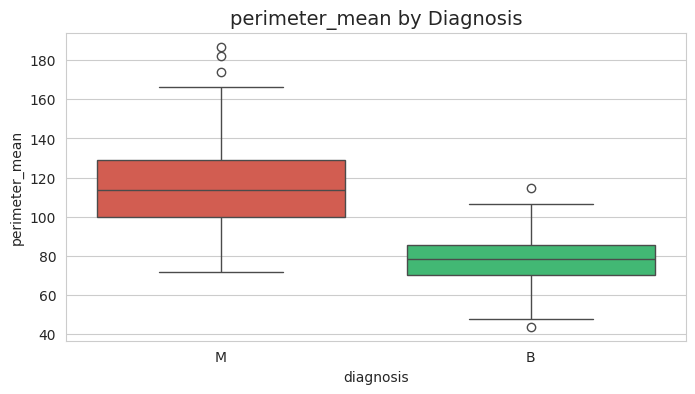

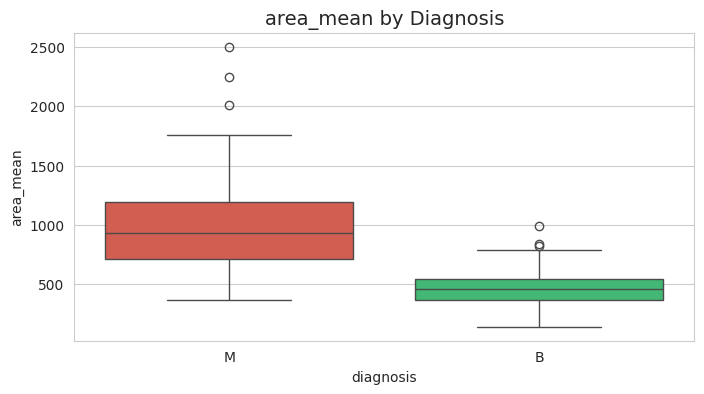

In [ ]:
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="diagnosis", y=feature, data=train, palette=palette_main)
    plt.title(f"{feature} by Diagnosis", fontsize=14)
    plt.show()

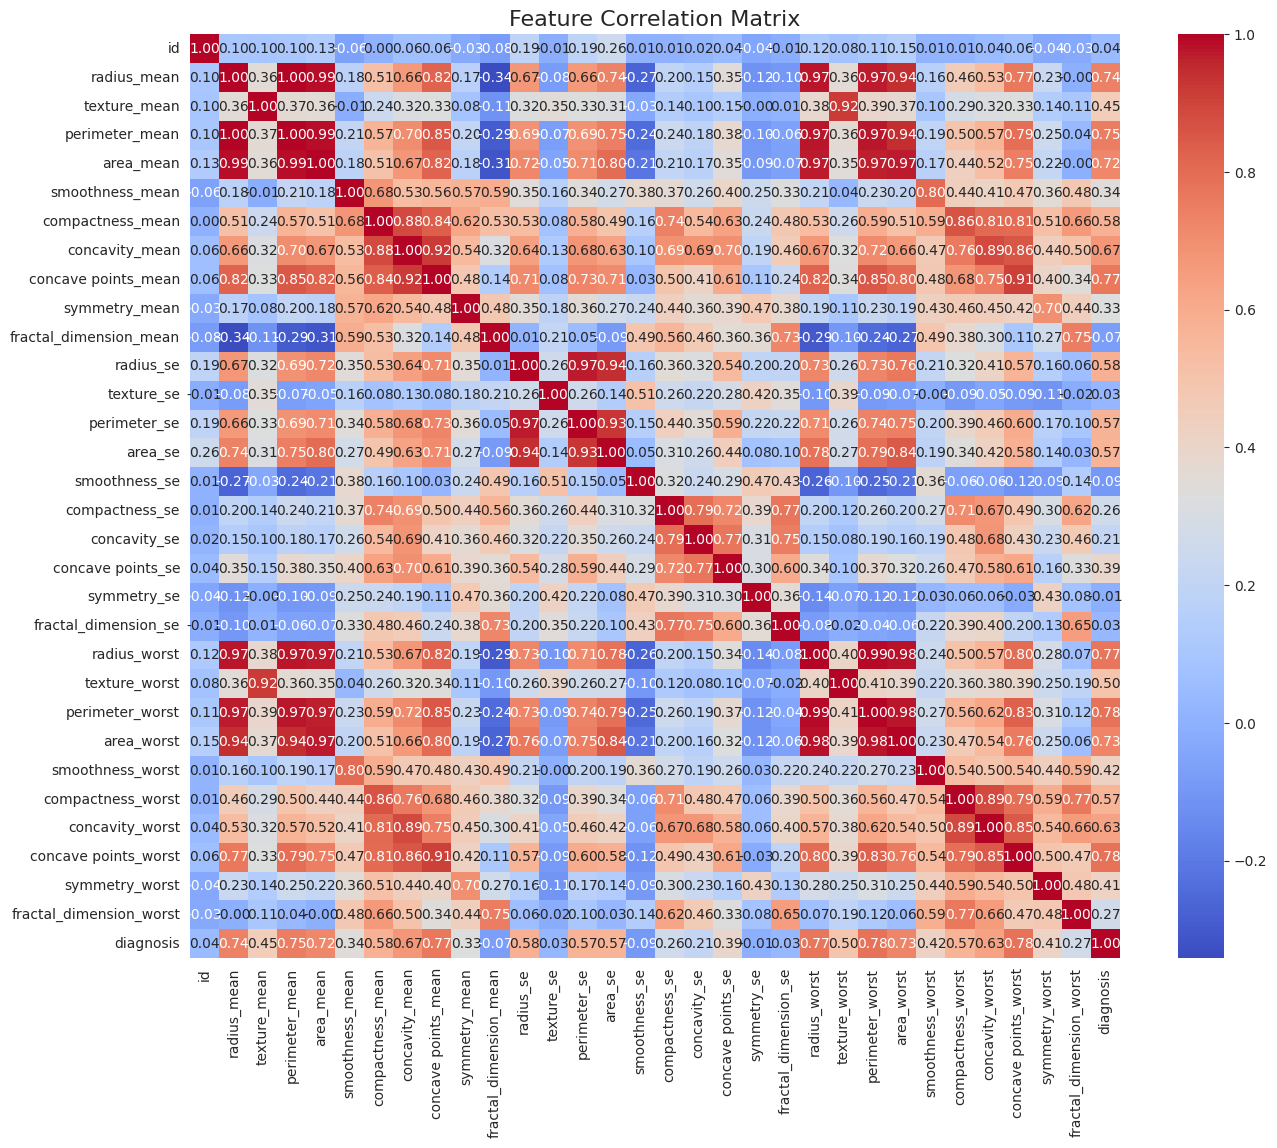

In [ ]:
train_corr = train.copy()
train_corr["diagnosis"] = train_corr["diagnosis"].map({"B":0, "M":1})

plt.figure(figsize=(15,12))
sns.heatmap(train_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

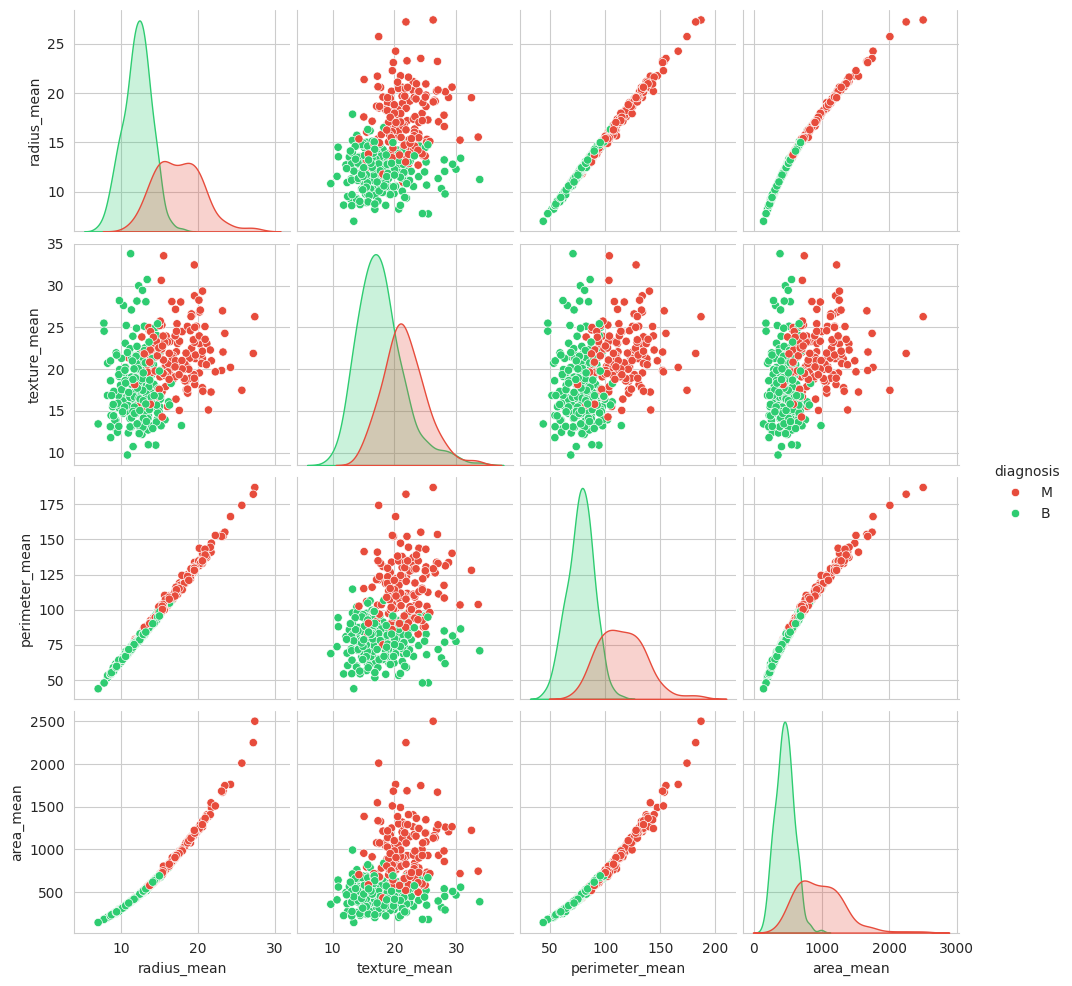

In [ ]:
sns.pairplot(train[["radius_mean","texture_mean","perimeter_mean","area_mean","diagnosis"]], hue="diagnosis", palette=palette_main)
plt.show()

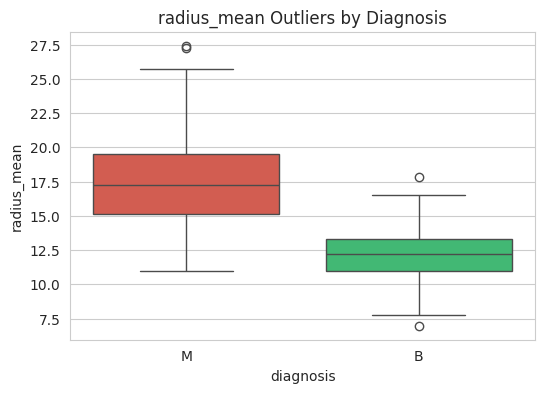

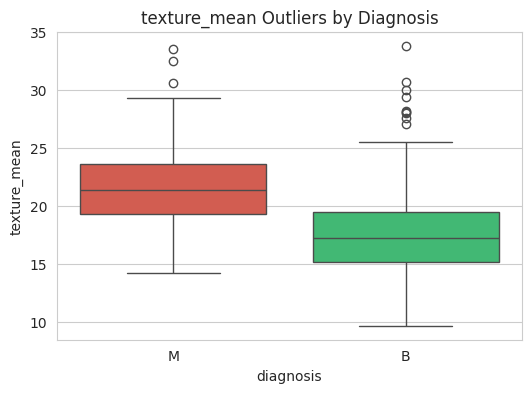

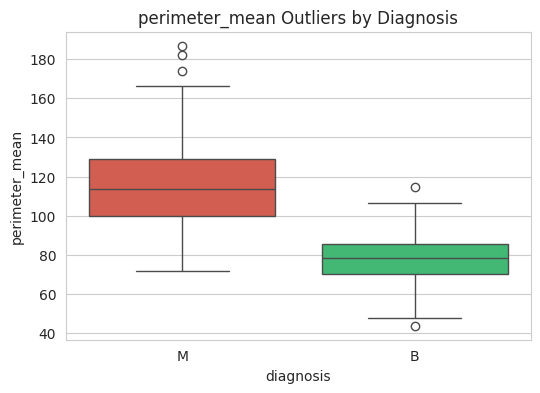

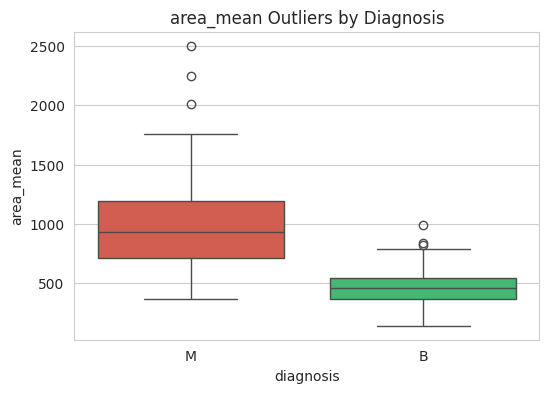

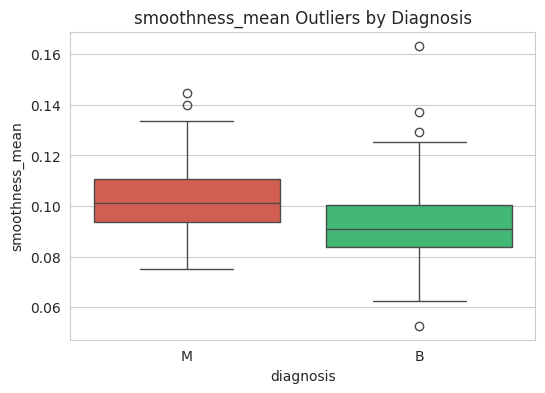

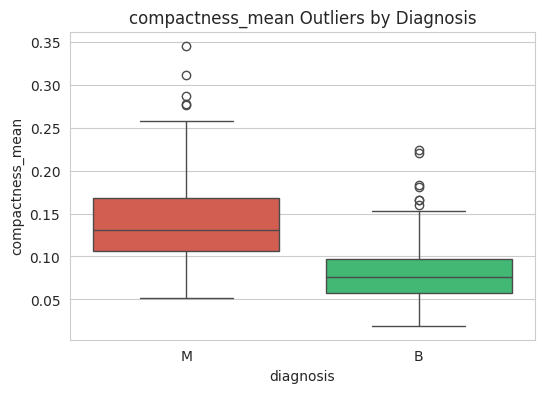

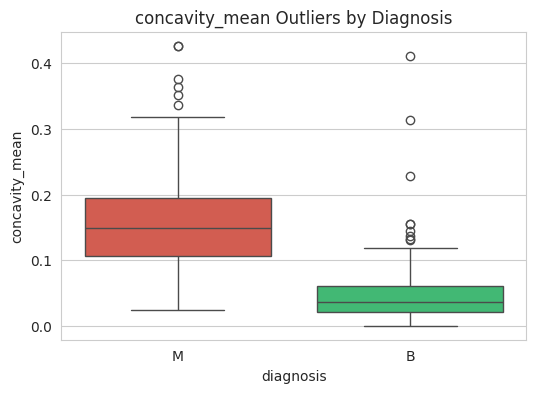

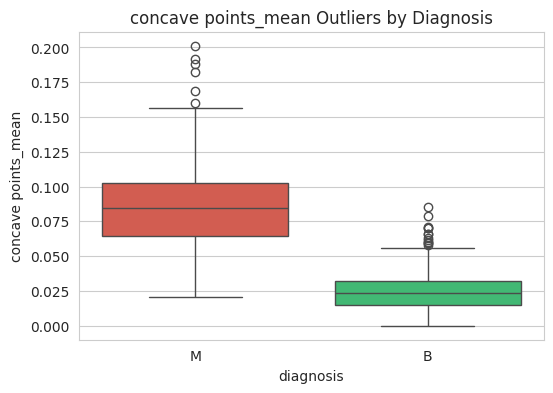

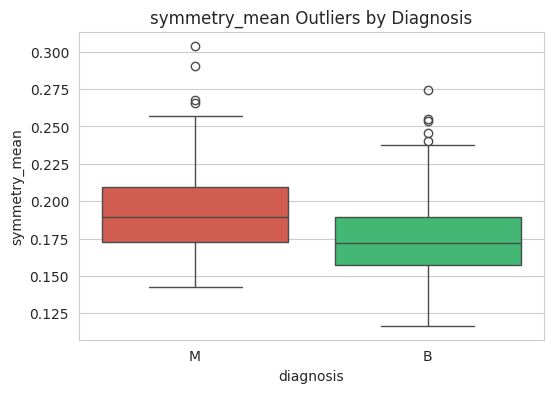

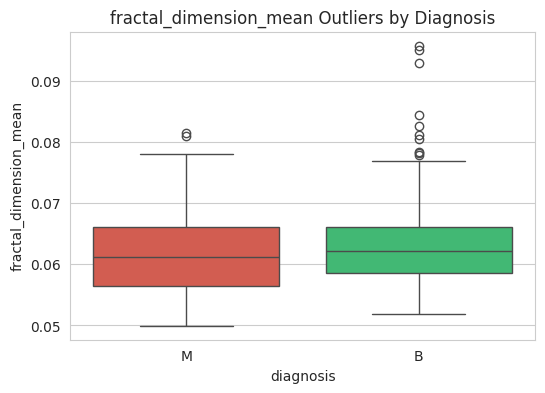

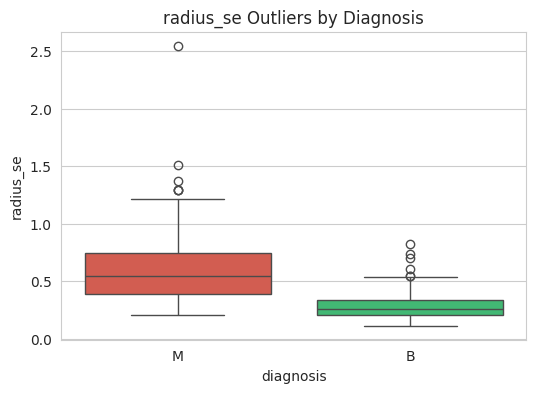

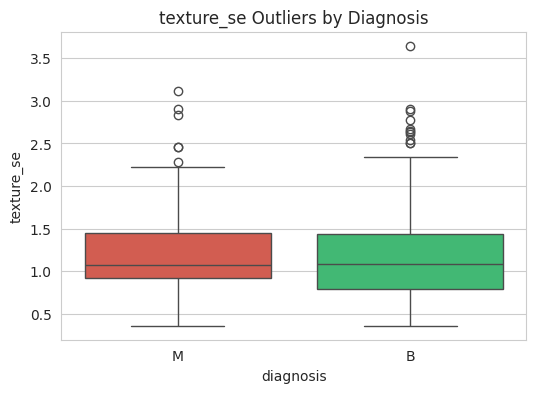

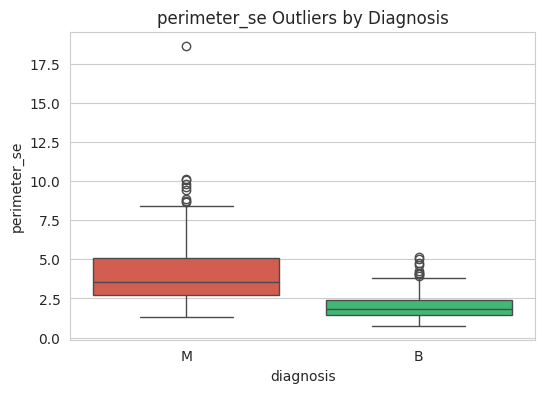

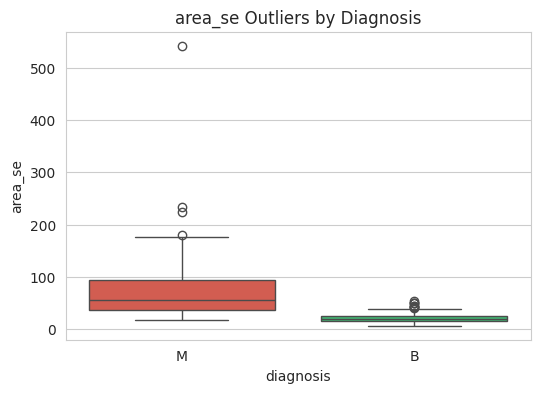

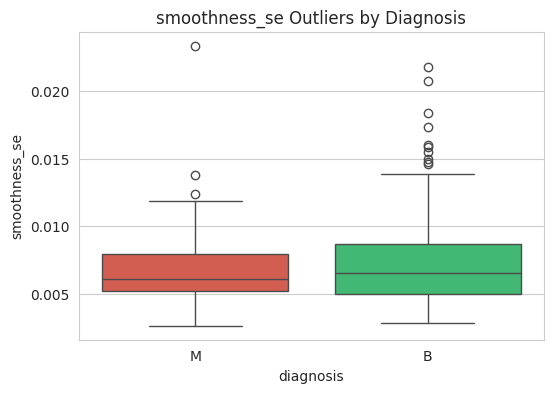

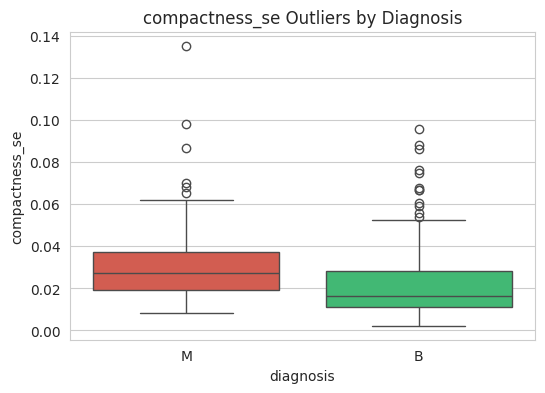

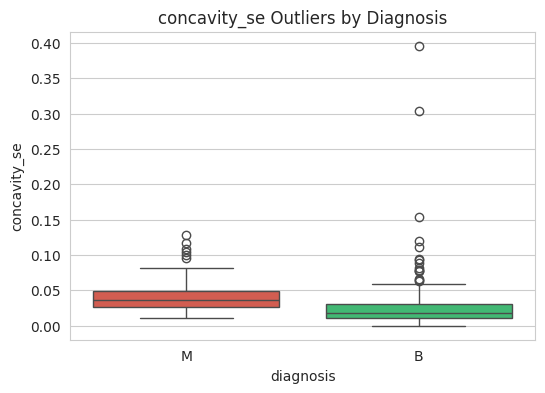

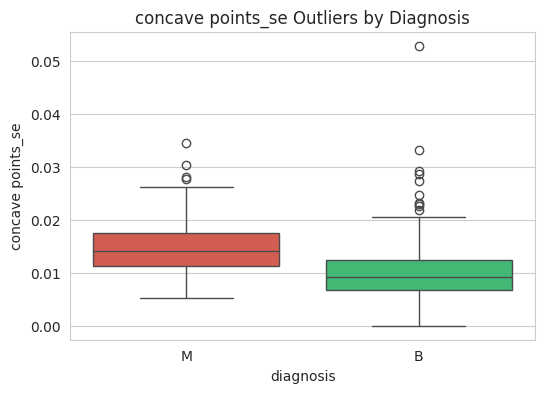

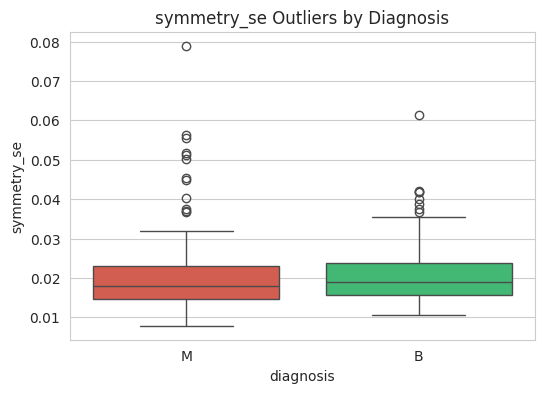

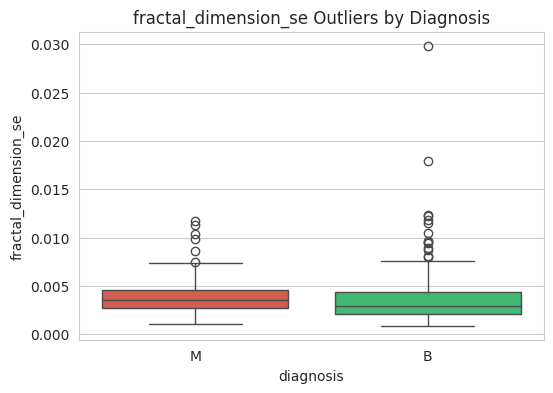

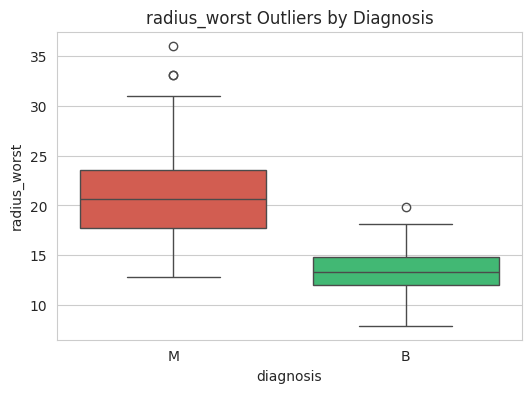

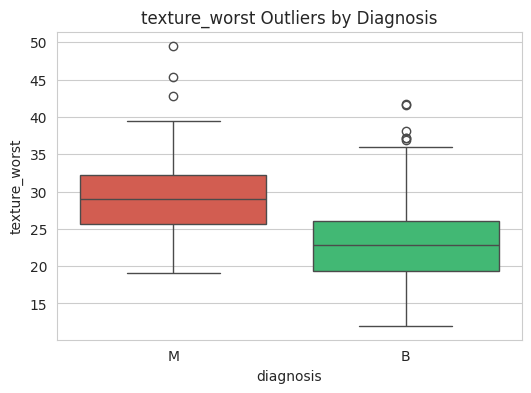

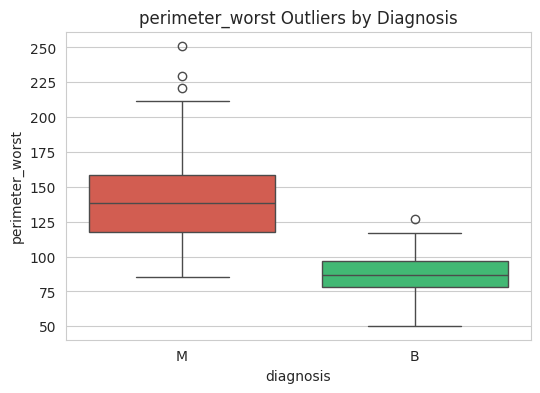

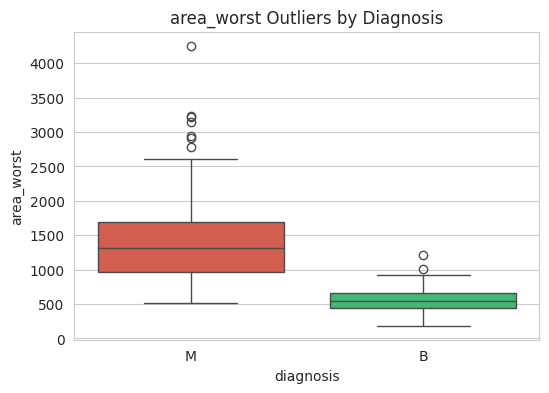

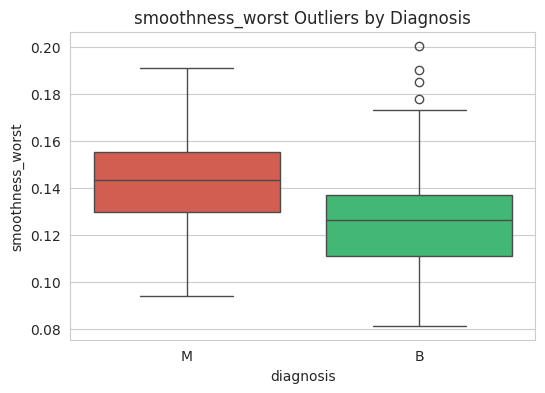

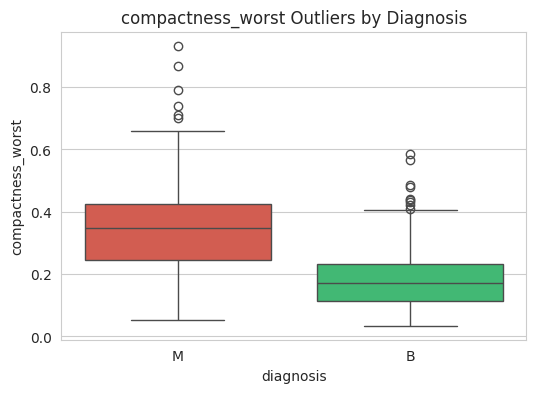

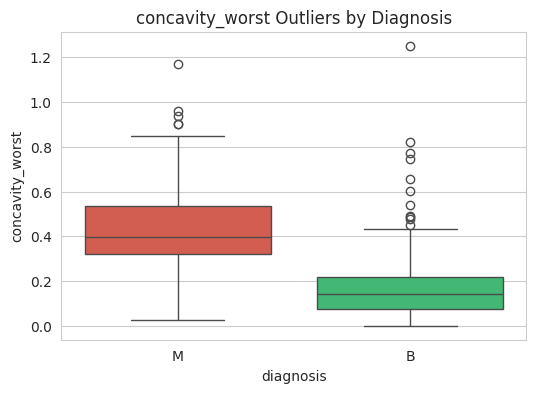

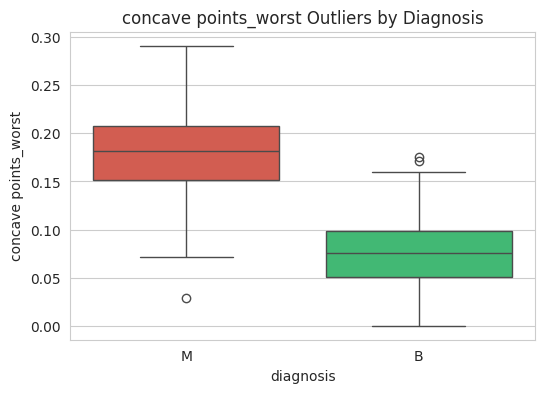

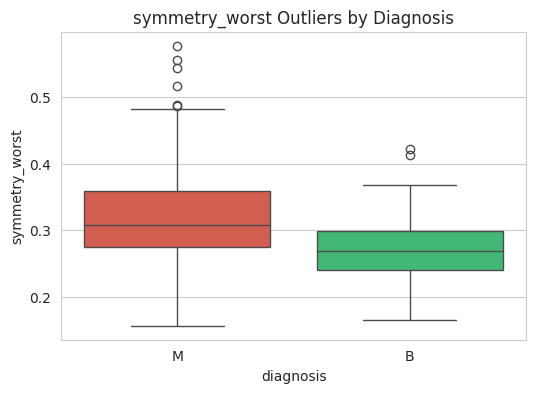

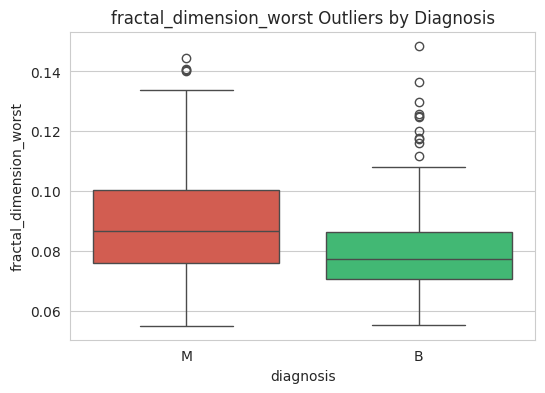

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = train.select_dtypes(include=["float64","int64"]).columns.drop("id")

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="diagnosis", y=feature, data=train, palette={"B":"#2ecc71", "M":"#e74c3c"})
    plt.title(f"{feature} Outliers by Diagnosis", fontsize=12)
    plt.show()

**Data Preprocessing**

In [ ]:
if "Unnamed: 32" in train.columns:
    train = train.drop(columns=["Unnamed: 32"])
if "Unnamed: 32" in test.columns:
    test = test.drop(columns=["Unnamed: 32"])

In [ ]:
train.isnull().sum().sum()

np.int64(0)

In [ ]:
test.isnull().sum().sum()

np.int64(0)

In [ ]:
numeric_features = train.select_dtypes(include=["float64","int64"]).columns.drop("id")

outlier_counts = {}

for feature in numeric_features:
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers_B = train[(train["diagnosis"]=="B") & ((train[feature]<lower) | (train[feature]>upper))].shape[0]
    outliers_M = train[(train["diagnosis"]=="M") & ((train[feature]<lower) | (train[feature]>upper))].shape[0]
    outlier_counts[feature] = {"B": outliers_B, "M": outliers_M}

outlier_counts_df = pd.DataFrame(outlier_counts).T
print(outlier_counts_df)


                          B   M
radius_mean               0   8
texture_mean              3   3
perimeter_mean            0   6
area_mean                 0  15
smoothness_mean           3   2
compactness_mean          0  11
concavity_mean            2  11
concave points_mean       0   7
symmetry_mean             3   8
fractal_dimension_mean    7   2
radius_se                 0  26
texture_se               11   5
perimeter_se              0  24
area_se                   0  45
smoothness_se            16   2
compactness_se            8   7
concavity_se              9   8
concave points_se         5   8
symmetry_se               8  12
fractal_dimension_se     14   5
radius_worst              0   8
texture_worst             2   3
perimeter_worst           0   9
area_worst                0  14
smoothness_worst          2   1
compactness_worst         0   7
concavity_worst           2   6
concave points_worst      0   0
symmetry_worst            1  13
fractal_dimension_worst   6   9


In [ ]:

numeric_features = train.select_dtypes(include=["float64","int64"]).columns.drop("id")

for feature in numeric_features:
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    train[feature] = np.where(train[feature] > upper, upper, train[feature])
    train[feature] = np.where(train[feature] < lower, lower, train[feature])

**Model Selection and Training**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = train.drop(columns=["id","diagnosis"])
y = train["diagnosis"].map({"B":0,"M":1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(name, "Accuracy:", accuracy_score(y_val, y_pred))

nn_model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16, verbose=0)

val_acc = history.history["val_accuracy"][-1]
print("Neural Network Validation Accuracy:", val_acc)

LogisticRegression Accuracy: 0.95
RandomForest Accuracy: 0.95
SVM Accuracy: 0.9625
Neural Network Validation Accuracy: 0.949999988079071


**Model Evaluation**

In [ ]:
X_train = train.drop(columns=["id","diagnosis"])
X_test = test.drop(columns=["id"])


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y)

SVC(probability=True)

In [ ]:
y_test_pred = svm_model.predict(X_test_scaled)
y_test_pred_label = np.where(y_test_pred==1, "M", "B")

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_model.fit(X_train, y_train)
y_val_pred = svm_model.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_val_pred)
error_rate = 1 - accuracy
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9625
Error Rate: 0.03749999999999998
Precision: 0.9545454545454546
Recall: 0.9130434782608695
F1 Score: 0.9333333333333333


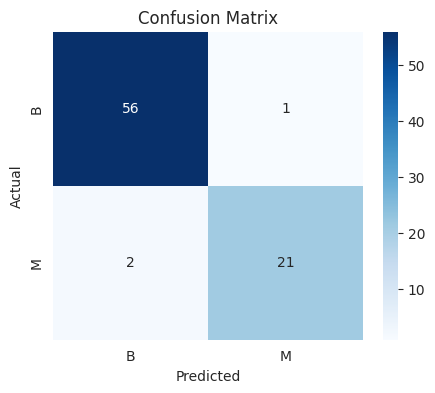

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["B","M"], yticklabels=["B","M"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Submission**

In [ ]:
submission = pd.DataFrame({
    "id": test["id"],
    "diagnosis": y_test_pred_label
})

In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
X = train.drop(columns=["id","diagnosis"])
y = train["diagnosis"].map({"B":0,"M":1})

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_scaled, y)

SVC(probability=True)

In [ ]:
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']